In [1]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
%matplotlib inline

#### Check out the data

In [2]:
# merging two csv files 
# student_data = pd.read_csv('combined_file.csv')
#student_data = pd.concat(map(pd.read_csv, ['student-mat.csv', 'student-por.csv']), ignore_index=True)

# Read the CSV files
df1 = pd.read_csv('student-mat.csv', sep=';')
df2 = pd.read_csv('student-por.csv', sep=';')

# Merge the two dataframes
student_data = pd.concat([df1, df2])

student_data.to_csv("combined.csv", index=False)

##### Understand the data

In [3]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
student_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [5]:
student_data.drop(columns=student_data.columns[0], axis=1,  inplace=True)

In [6]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         1044 non-null   object
 1   age         1044 non-null   int64 
 2   address     1044 non-null   object
 3   famsize     1044 non-null   object
 4   Pstatus     1044 non-null   object
 5   Medu        1044 non-null   int64 
 6   Fedu        1044 non-null   int64 
 7   Mjob        1044 non-null   object
 8   Fjob        1044 non-null   object
 9   reason      1044 non-null   object
 10  guardian    1044 non-null   object
 11  traveltime  1044 non-null   int64 
 12  studytime   1044 non-null   int64 
 13  failures    1044 non-null   int64 
 14  schoolsup   1044 non-null   object
 15  famsup      1044 non-null   object
 16  paid        1044 non-null   object
 17  activities  1044 non-null   object
 18  nursery     1044 non-null   object
 19  higher      1044 non-null   object
 20  internet    10

In [7]:
student_data.drop_duplicates()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,4,3,4,1,1,3,6,5,6,6
1,F,17,U,GT3,T,1,1,at_home,other,course,...,5,3,3,1,1,3,4,5,5,6
2,F,15,U,LE3,T,1,1,at_home,other,other,...,4,3,2,2,3,3,10,7,8,10
3,F,15,U,GT3,T,4,2,health,services,home,...,3,2,2,1,1,5,2,15,14,15
4,F,16,U,GT3,T,3,3,other,other,home,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,F,19,R,GT3,T,2,3,services,other,course,...,5,4,2,1,2,5,4,10,11,10
645,F,18,U,LE3,T,3,1,teacher,services,course,...,4,3,4,1,1,1,4,15,15,16
646,F,18,U,GT3,T,1,1,other,other,course,...,1,1,1,1,1,5,6,11,12,9
647,M,17,U,LE3,T,3,1,services,services,course,...,2,4,5,3,4,2,6,10,10,10


In [8]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         1044 non-null   object
 1   age         1044 non-null   int64 
 2   address     1044 non-null   object
 3   famsize     1044 non-null   object
 4   Pstatus     1044 non-null   object
 5   Medu        1044 non-null   int64 
 6   Fedu        1044 non-null   int64 
 7   Mjob        1044 non-null   object
 8   Fjob        1044 non-null   object
 9   reason      1044 non-null   object
 10  guardian    1044 non-null   object
 11  traveltime  1044 non-null   int64 
 12  studytime   1044 non-null   int64 
 13  failures    1044 non-null   int64 
 14  schoolsup   1044 non-null   object
 15  famsup      1044 non-null   object
 16  paid        1044 non-null   object
 17  activities  1044 non-null   object
 18  nursery     1044 non-null   object
 19  higher      1044 non-null   object
 20  internet    10

In [9]:
df_corr = student_data

df_corr.drop(['address','Mjob', 'Fjob', 'reason', 'guardian'], axis=1, inplace=True)

df_corr['sex'] = df_corr['sex'].map({'F': 0, 'M': 1})

df_corr['famsize'] = df_corr['famsize'].map({'LE3': 0, 'GT3': 1})

df_corr['Pstatus'] = df_corr['Pstatus'].map({'A': 0, 'T': 1})

df_corr['schoolsup'] = df_corr['schoolsup'].map({'no': 0, 'yes': 1})

df_corr['famsup'] = df_corr['famsup'].map({'no': 0, 'yes': 1})

df_corr['paid'] = df_corr['paid'].map({'no': 0, 'yes': 1})

df_corr['activities'] = df_corr['activities'].map({'no': 0, 'yes': 1})

df_corr['nursery'] = df_corr['nursery'].map({'no': 0, 'yes': 1})

df_corr['higher'] = df_corr['higher'].map({'no': 0, 'yes': 1})

df_corr['internet'] = df_corr['internet'].map({'no': 0, 'yes': 1})

df_corr['romantic'] = df_corr['romantic'].map({'no': 0, 'yes': 1})

In [10]:
df_corr

,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,18,1,0,4,4,2,2,0,1,...,4,3,4,1,1,3,6,5,6,6
1,0,17,1,1,1,1,1,2,0,0,...,5,3,3,1,1,3,4,5,5,6
2,0,15,0,1,1,1,1,2,3,1,...,4,3,2,2,3,3,10,7,8,10
3,0,15,1,1,4,2,1,3,0,0,...,3,2,2,1,1,5,2,15,14,15
4,0,16,1,1,3,3,1,2,0,0,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,19,1,1,2,3,1,3,1,0,...,5,4,2,1,2,5,4,10,11,10
645,0,18,0,1,3,1,1,2,0,0,...,4,3,4,1,1,1,4,15,15,16
646,0,18,1,1,1,1,2,2,0,0,...,1,1,1,1,1,5,6,11,12,9
647,1,17,0,1,3,1,2,1,0,0,...,2,4,5,3,4,2,6,10,10,10


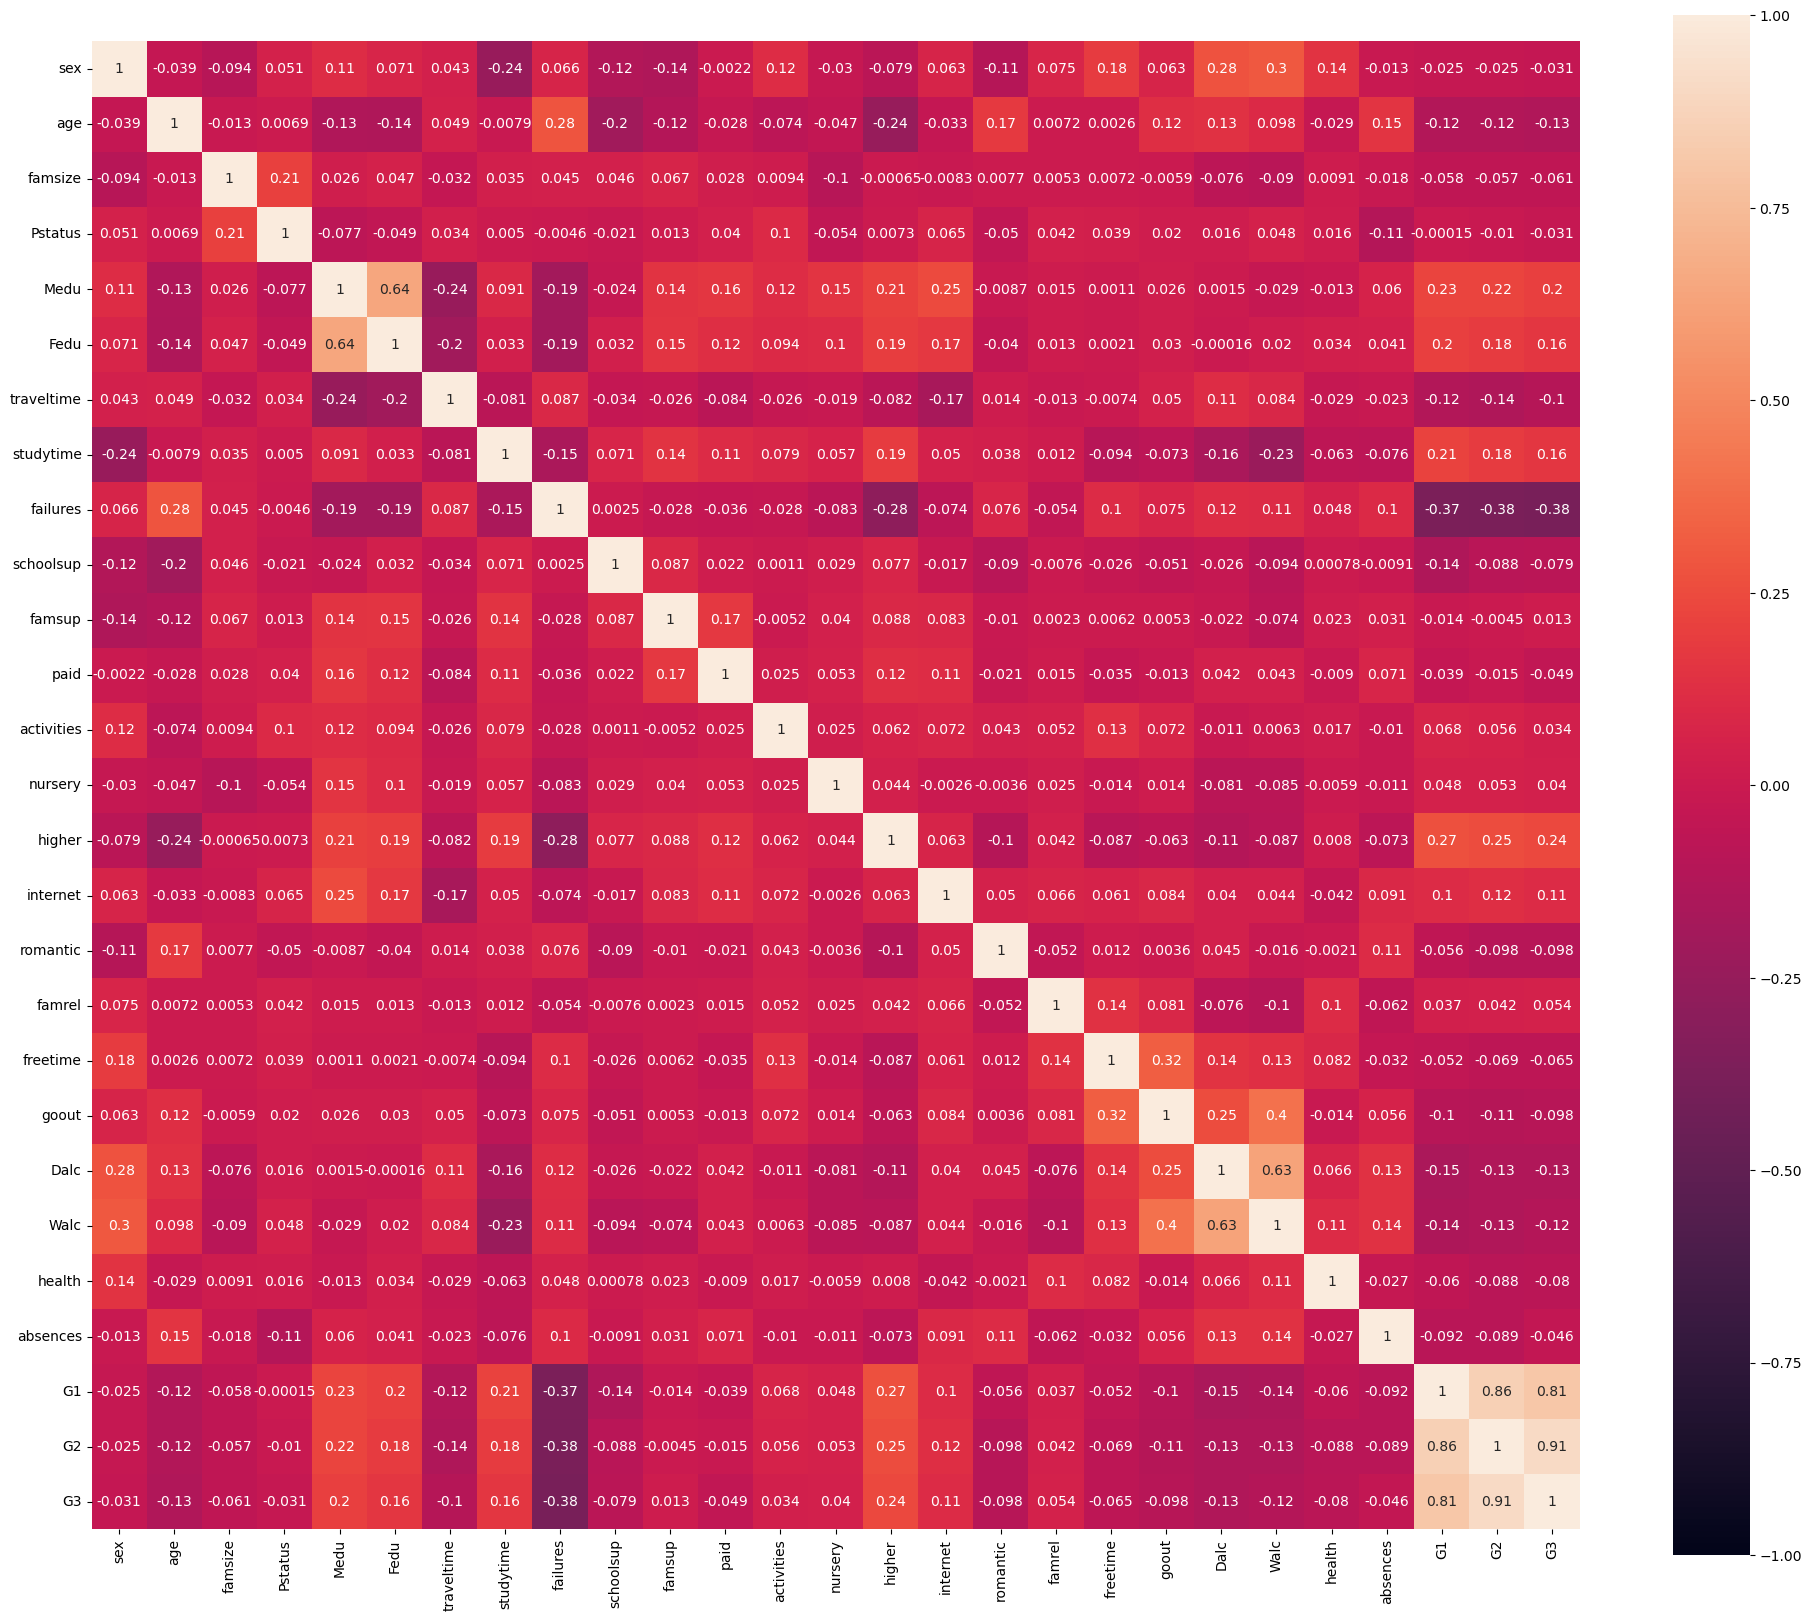

In [11]:
corr_matrix = df_corr.corr(numeric_only=True)
f,ax = plt.subplots(figsize=(24,20))
sns.heatmap(corr_matrix,vmin=-1,vmax=1, square = True, annot = True);

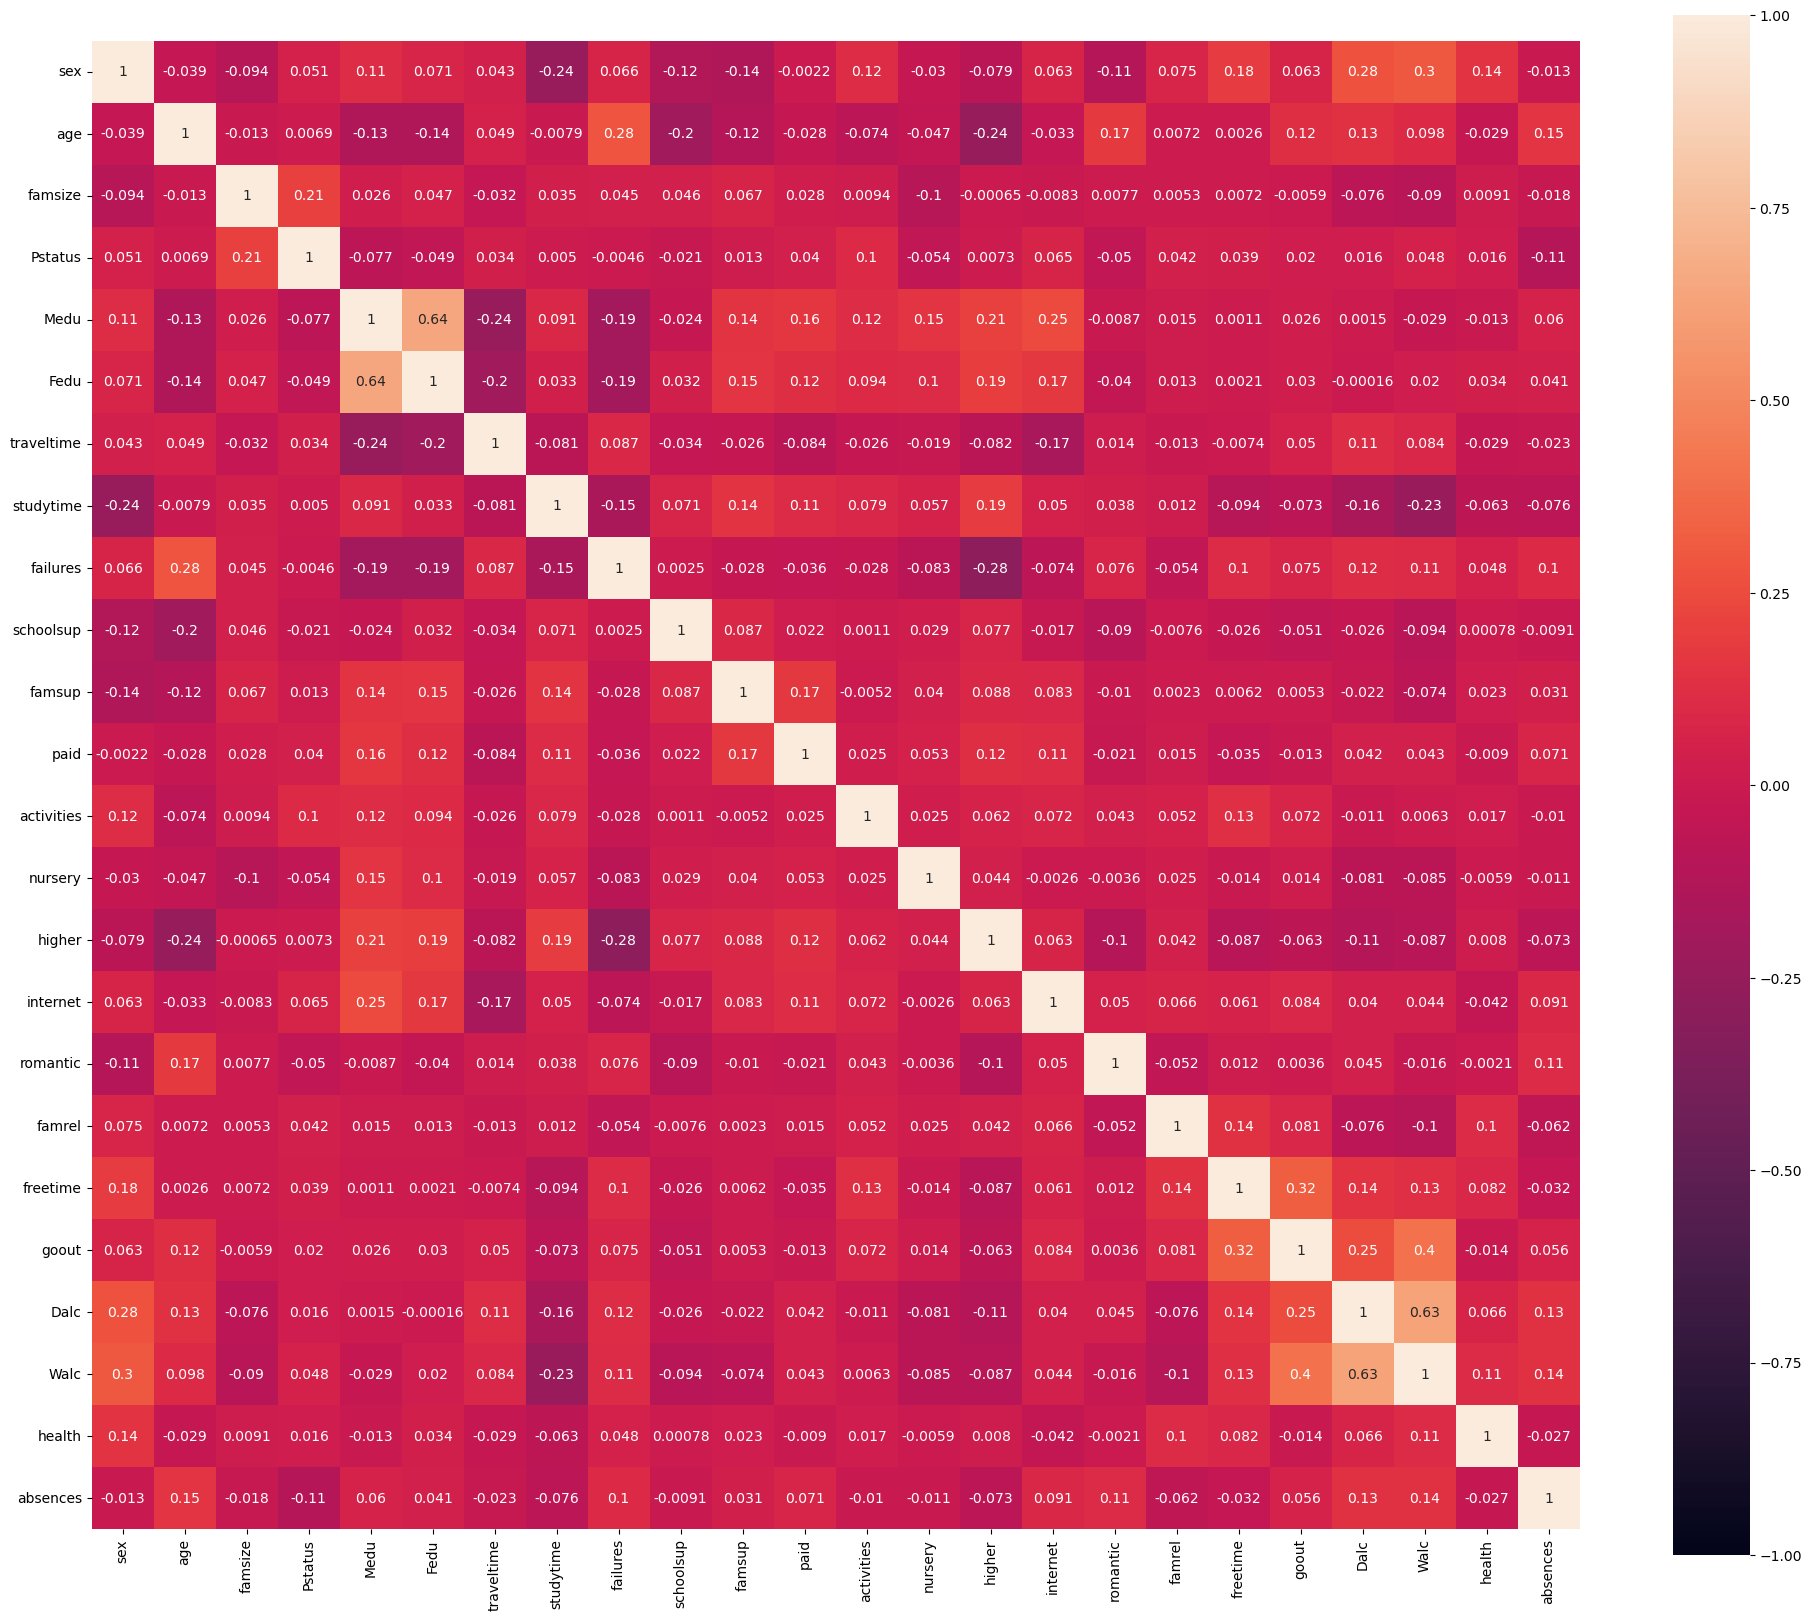

In [12]:
df_corr_2 = df_corr

df_corr_2.drop(['G1','G2','G3'], axis=1, inplace=True)

corr_matrix_2 = df_corr_2.corr(numeric_only=True)
f,ax = plt.subplots(figsize=(24,20))
sns.heatmap(corr_matrix_2,vmin=-1,vmax=1, square = True, annot = True);

In [27]:
top_corr = corr_matrix_2.unstack()
top_corr = top_corr[top_corr != 1]  # Filter out correlations with a value of '1'
top_10_corr = top_corr.nlargest(20)  # Get the top 10 correlations

# The result will be a Pandas Series with the top 10 correlations (excluding '1')
print(top_10_corr)

Medu      Fedu        0.642063
Fedu      Medu        0.642063
Dalc      Walc        0.627814
Walc      Dalc        0.627814
goout     Walc        0.399794
Walc      goout       0.399794
freetime  goout       0.323556
goout     freetime    0.323556
sex       Walc        0.302623
Walc      sex         0.302623
age       failures    0.282364
failures  age         0.282364
sex       Dalc        0.275928
Dalc      sex         0.275928
goout     Dalc        0.253135
Dalc      goout       0.253135
Medu      internet    0.249728
internet  Medu        0.249728
famsize   Pstatus     0.207302
Pstatus   famsize     0.207302
dtype: float64


In [29]:
top_down_corr = corr_matrix.unstack()
top_down_10_corr = top_corr.nsmallest(20)  # Get the top 10 correlations

# The result will be a Pandas Series with the top 10 correlations (excluding '1')
print(top_down_10_corr)

failures    higher       -0.284893
higher      failures     -0.284893
age         higher       -0.244601
higher      age          -0.244601
sex         studytime    -0.239972
studytime   sex          -0.239972
Medu        traveltime   -0.238181
traveltime  Medu         -0.238181
studytime   Walc         -0.229073
Walc        studytime    -0.229073
age         schoolsup    -0.202824
schoolsup   age          -0.202824
Fedu        traveltime   -0.196328
traveltime  Fedu         -0.196328
Fedu        failures     -0.191390
failures    Fedu         -0.191390
Medu        failures     -0.187769
failures    Medu         -0.187769
traveltime  internet     -0.169485
internet    traveltime   -0.169485
dtype: float64


In [14]:
X = student_data[['age', 'sex', 'Pstatus', 'famsize', 'Medu', 'Fedu', 'studytime', 'famsup', 'famrel', 'paid','goout', 'activities' , 'Dalc', 'Walc']]
y = student_data[['absences', 'higher', 'health','failures']]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train


,age,sex,Pstatus,famsize,Medu,Fedu,studytime,famsup,famrel,paid,goout,activities,Dalc,Walc
376,18,0,1,1,1,1,3,0,4,0,5,1,1,2
492,16,0,0,1,2,2,2,0,3,0,2,0,1,1
262,17,0,0,0,1,4,1,1,5,0,4,0,1,1
593,18,0,0,0,1,2,2,0,4,0,3,0,1,2
487,18,0,0,0,3,2,3,1,3,0,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,15,0,1,1,2,2,1,1,4,1,1,1,1,1
465,18,0,1,1,1,2,2,1,3,0,4,1,2,3
153,19,1,1,1,3,2,1,1,4,0,4,0,1,1
547,16,1,1,0,4,1,1,0,4,0,2,0,2,1


<Axes: ylabel='Count'>

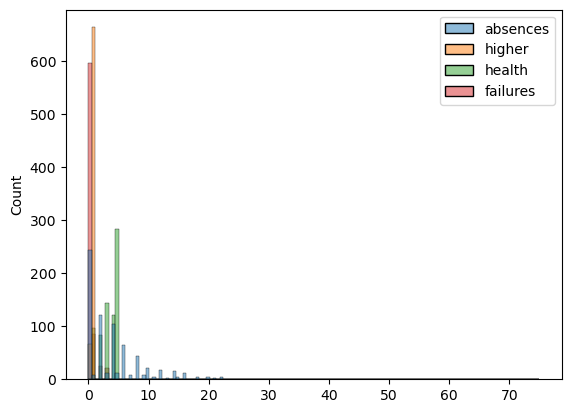

In [16]:
sns.histplot(y_train)


<Axes: ylabel='Count'>

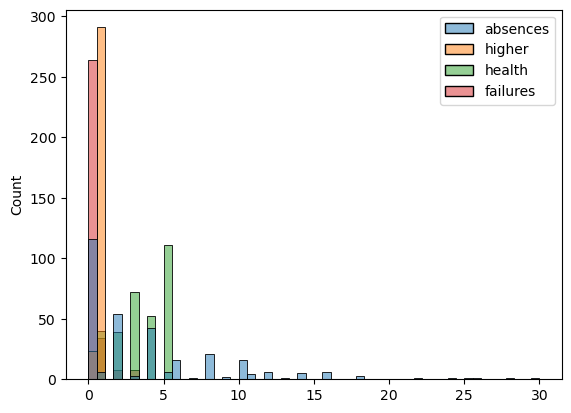

In [17]:
sns.histplot(y_test)

In [18]:
''' decision tree '''
clf = DecisionTreeClassifier(random_state=2021)

In [19]:
X_train = X_train.drop(['sex','Pstatus', 'famsize', 'famsup','paid','activities'],axis=1)
X_test = X_test.drop(['sex','Pstatus', 'famsize', 'famsup','paid','activities'],axis=1)
y_train = y_train.drop(['higher'],axis=1)
y_test = y_test.drop(['higher'],axis=1)

clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2021)

In [20]:
y_test

,absences,health,failures
13,2,3,0
565,0,5,0
477,11,3,0
332,0,4,0
447,8,3,0
...,...,...,...
349,0,5,0
341,0,2,1
82,4,5,0
214,2,2,0


In [21]:
dt_predictions = clf.predict(X_test)

In [22]:
pred = clf.predict(X_test)

In [23]:
cm = metrics.confusion_matrix(y_test, pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()
plt.show()

ValueError: multiclass-multioutput is not supported

In [ ]:
accuracy = accuracy_score(y_test, pred)
print(f'accuracy: {accuracy:.2f}')
